In [1]:
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import sys
import itertools
from collections import namedtuple, defaultdict
from pathlib import Path

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 1
%aimport analyze

with open('plots/style.json') as f:
    mpl.rcParams.update(json.load(f))

# Results

## Wildstyle failures

In [2]:
ws = analyze.Analysis('results/wildstyle')
print(ws)

Analysis for Celeritas v0.4.4-rc.1 on wildstyle


In [3]:
ftab = analyze.make_failure_table(ws.failures())
ftab.to_frame()

,Failure
atlas-tilecal/orange+cpu (0),internal assertion failed: `volume` at `Orange...
atlas-tilecal/orange+cpu (1),internal assertion failed: `volume` at `Orange...
atlas-tilecal/orange+gpu (0),"`{""input"":{""_format"":""celer-sim"",""_version"":""0..."
atlas-tilecal/orange+gpu (1),"`{""input"":{""_format"":""celer-sim"",""_version"":""0..."
atlas-tilecal/vecgeom+cpu (0),(unknown failure)
atlas-tilecal/vecgeom+cpu (1),(unknown failure)
cms-hgcal/orange+cpu (0),(unknown failure)
cms-hgcal/orange+cpu (1),(unknown failure)
cms-hgcal/vecgeom+cpu (0),(unknown failure)
cms-hgcal/vecgeom+cpu (1),(unknown failure)


In [4]:
#ftab.to_dict()

{'cms2018+field+msc/vecgeom+cpu (0)': 'internal assertion failed: `track.make_geo_view().pos() != orig_pos` at `PropagationApplier.hh:116`'}

In [6]:
ftab['cms2018+field+msc/vecgeom+cpu (0)']

'(unknown failure)'

Unconverged tracks (from runs that didn't fail):

In [7]:
summed = analyze.summarize_instances(ws.result[['unconverged']])
unconv = summed[('unconverged', 'mean')]
unconv[unconv > 0].unstack('arch') 

,arch
problem,geo


## Frontier

In [8]:
frontier = analyze.Analysis('results/frontier')
print(frontier)

Analysis for Celeritas v0.4.4-rc.2 on frontier


In [9]:
ftab = analyze.make_failure_table(frontier.failures())
ftab.to_frame()

,Failure
atlas-tilecal/orange+cpu (0),`srun: error: frontier10482: task 0: Segmentat...
atlas-tilecal/orange+cpu (1),`srun: error: frontier10482: task 0: Segmentat...
atlas-tilecal/orange+cpu (2),`srun: error: frontier10482: task 0: Segmentat...
atlas-tilecal/orange+cpu (3),`srun: error: frontier10482: task 0: Segmentat...
atlas-tilecal/orange+cpu (4),`srun: error: frontier10482: task 0: Segmentat...
atlas-tilecal/orange+cpu (5),`srun: error: frontier10482: task 0: Segmentat...
atlas-tilecal/orange+cpu (6),`srun: error: frontier10482: task 0: Segmentat...
atlas-tilecal/orange+cpu (7),`srun: error: frontier10482: task 0: Segmentat...
atlas-tilecal/orange+cpu+g4 (0),`srun: error: frontier10482: task 0: Exited wi...
atlas-tilecal/orange+cpu+g4 (1),`srun: error: frontier10482: task 0: Exited wi...


In [11]:
analyze.calc_geo_frac(frontier)

count      mean       std
problem                     geo    arch                           
cms-hgcal                   orange cpu     8.0  0.690889  0.002398
testem15                    orange cpu     8.0  0.429516  0.000810
testem15+field              orange cpu     8.0  0.542067  0.000487
                                   gpu     8.0  0.525380  0.000691
testem15+field+msc          orange cpu     8.0  0.640621  0.000480
testem3-composite+field+msc orange cpu     8.0  0.815128  0.001915
                                   gpu     8.0  0.885667  0.002270
testem3-composite+msc       orange cpu     8.0  0.791316  0.003756
testem3-flat                orange cpu     8.0  0.535109  0.000542
testem3-flat+field          orange cpu     8.0  0.616280  0.000855
testem3-flat+field+msc      orange cpu     8.0  0.764014  0.000508
                                   gpu     8.0  0.820114  0.000751
testem3-flat+msc            orange cpu     8.0  0.730158  0.000505

In [12]:
frontier.result["action_times"]

problem        geo     arch    instance
atlas-tilecal  geant4  g4      0           NaN
                               1           NaN
                               2           NaN
                               3           NaN
                               4           NaN
                                          ... 
testem3-flat   orange  gpu+g4  3           NaN
                               4           NaN
                               5           NaN
                               6           NaN
                               7           NaN
Name: action_times, Length: 480, dtype: object

## Perlmutter

In [13]:
perlmutter = analyze.Analysis('results/perlmutter')
print(perlmutter)

Analysis for Celeritas v0.4.3-7+0967ac32c on perlmutter


In [14]:
ftab = analyze.make_failure_table(perlmutter.failures())
ftab.to_frame()

,Failure
atlas-tilecal/orange+cpu (0),`srun: error: nid002801: task 0: Segmentation ...
atlas-tilecal/orange+cpu (1),`srun: error: nid002801: task 0: Segmentation ...
atlas-tilecal/orange+cpu (2),`srun: error: nid002801: task 0: Segmentation ...
atlas-tilecal/orange+cpu (3),`srun: error: nid002801: task 0: Segmentation ...
atlas-tilecal/orange+gpu (0),(unknown failure)
atlas-tilecal/orange+gpu (1),(unknown failure)
atlas-tilecal/orange+gpu (2),(unknown failure)
atlas-tilecal/orange+gpu (3),(unknown failure)


# Occupancy

In [15]:
problem = "testem3-flat"
kernel_stats = {
    "cuda/vecgeom": analyze.load_kernels(perlmutter, problem, "vecgeom"),
    "cuda/orange": analyze.load_kernels(perlmutter, problem, "orange"),
    "hip/orange": analyze.load_kernels(frontier, problem, "orange"),
}
ksdf = analyze.kernel_stats_dataframe(kernel_stats)

In [16]:
ksdf[ksdf['local_mem'] > 64]

const_mem  \
arch geo     name                                                     
cuda vecgeom along-step-general-linear-apply-eloss-fluct      20776   
     orange  initialize-tracks                                    0   
             along-step-general-linear-apply-eloss-fluct          0   
             photoel-livermore                                    0   
             annihil-2-gamma                                      0   
             geo-boundary                                         0   
hip  orange  initialize-tracks                                    0   
             geo-boundary                                         0   

                                                            heap_size  \
arch geo     name                                                       
cuda vecgeom along-step-general-linear-apply-eloss-fluct      8388608   
     orange  initialize-tracks                                8388608   
             along-step-general-linear-apply-eloss-fluct      8388608   
             photoel-livermore                                8388608   
             annihil-2-gamma                                  8388608   
             geo-boundary                                     8388608   
hip  orange  initialize-tracks                            68702699520   
             geo-boundary                                 68702699520   

                                                          local_mem  \
arch geo     name                                                     
cuda vecgeom along-step-general-linear-apply-eloss-fluct        104   
     orange  initialize-tracks                                  112   
             along-step-general-linear-apply-eloss-fluct        104   
             photoel-livermore                                   72   
             annihil-2-gamma                                     72   
             geo-boundary                                       152   
hip  orange  initialize-tracks                                  120   
             geo-boundary                                       120   

                                                          max_blocks_per_cu  \
arch geo     name                                                             
cuda vecgeom along-step-general-linear-apply-eloss-fluct                  3   
     orange  initialize-tracks                                            4   
             along-step-general-linear-apply-eloss-fluct                  3   
             photoel-livermore                                            3   
             annihil-2-gamma                                              4   
             geo-boundary                                                 4   
hip  orange  initialize-tracks                                            5   
             geo-boundary                                                 5   

                                                          max_threads_per_block  \
arch geo     name                                                                 
cuda vecgeom along-step-general-linear-apply-eloss-fluct                    256   
     orange  initialize-tracks                                              256   
             along-step-general-linear-apply-eloss-fluct                    256   
             photoel-livermore                                              256   
             annihil-2-gamma                                                256   
             geo-boundary                                                   256   
hip  orange  initialize-tracks                                              256   
             geo-boundary                                                   256   

                                                          max_warps_per_eu  \
arch geo     name                                                            
cuda vecgeom along-step-general-linear-apply-eloss-fluct                24   
     orange  initialize-tracks                   

In [24]:
import importlib
update = importlib.import_module("update-plots")


Analysis for Celeritas v0.4.4-rc.2 on frontier
Speedup for testem3 (relative to geant4/g4 ):
arch         cpu    cpu+g4        gpu     gpu+g4
geo                                             
orange  1.388035  1.237297  16.652958  10.074771
Speedups: 6.6×–18×
GPU capacity: 85%–94%
CPU:GPU equivalence: 46×–127×

Analysis for Celeritas v0.4.3-7+0967ac32c on perlmutter
Speedup for testem3 (relative to orange/cpu ):
arch          cpu        gpu
geo                         
orange   1.000000  10.088189
vecgeom  1.018874   4.045166
Speedups: 1.9×–14×
GPU capacity: 47%–93%
CPU:GPU equivalence: 13×–100×
Missing problem/geo: cms2018+field+msc orange
skipping vs-geant4 plots because it's not in the results: Index(['orange', 'vecgeom'], dtype='object', name='geo')
All problems seem to have failed: "None of [MultiIndex([(              'atlas-tilecal', 'geant4', 'g4'),\n            (                  'cms-hgcal', 'geant4', 'g4'),\n            (                    'cms2018', 'geant4', 'g4'),\n      

TypeError: groupby() got an unexpected keyword argument 'level'

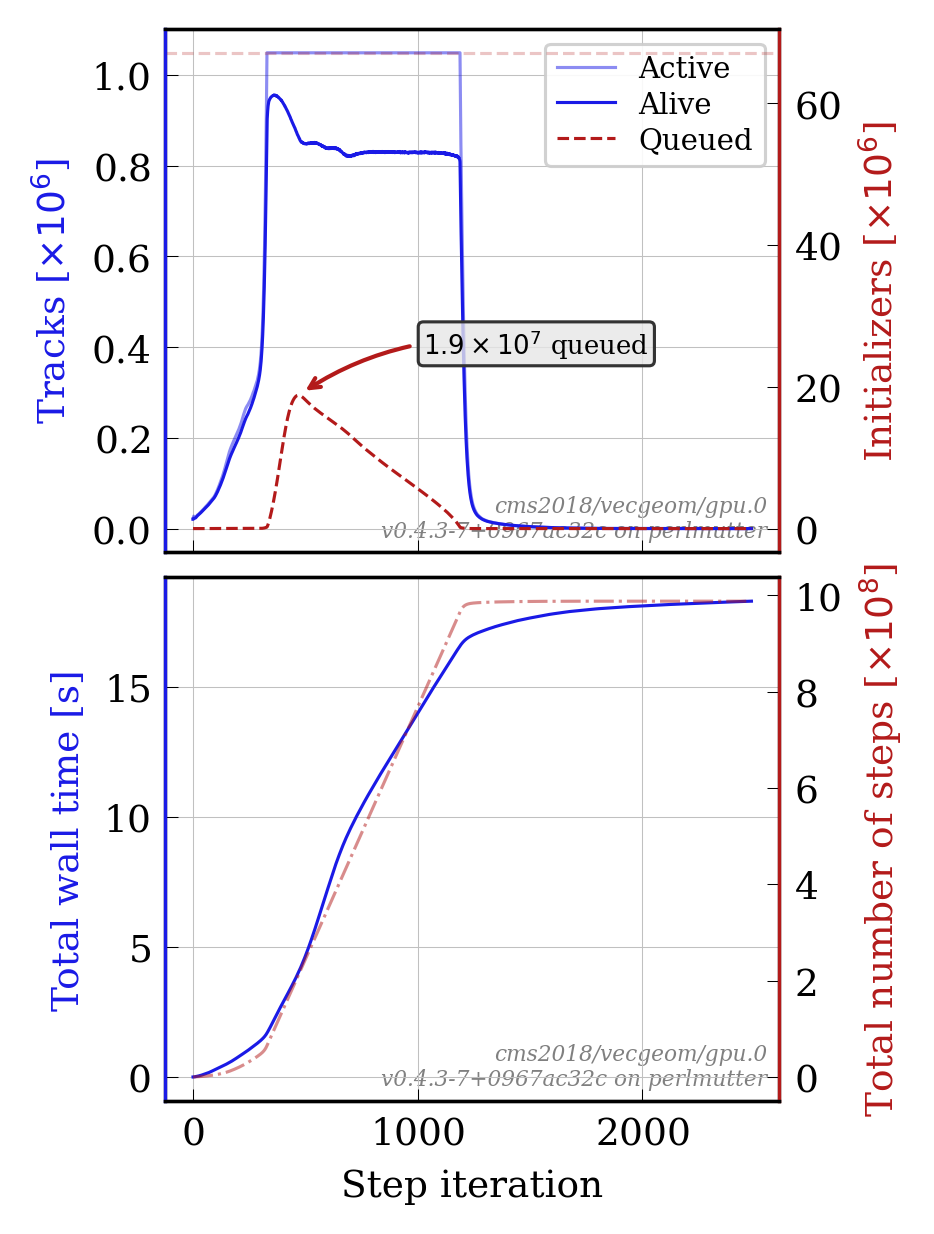

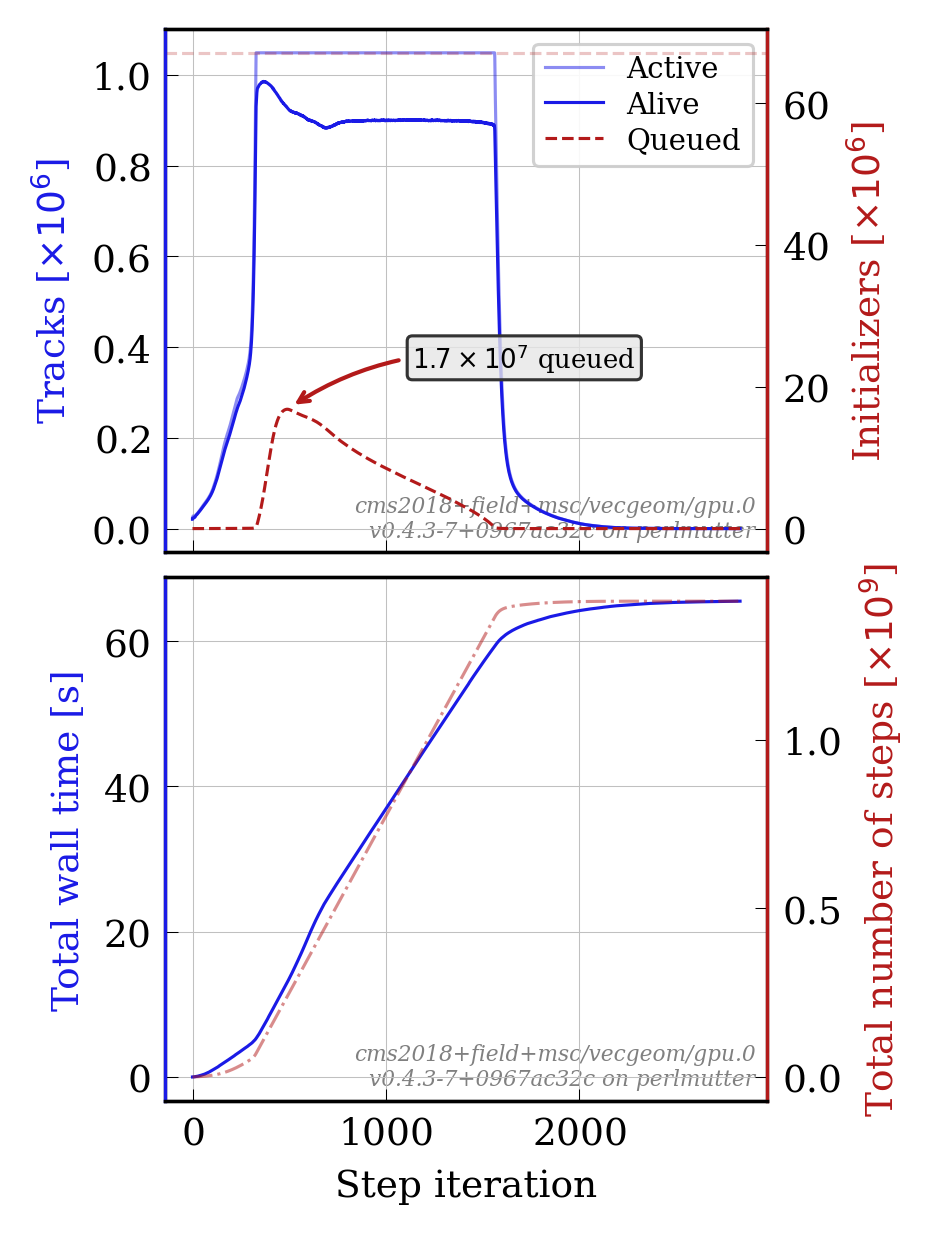

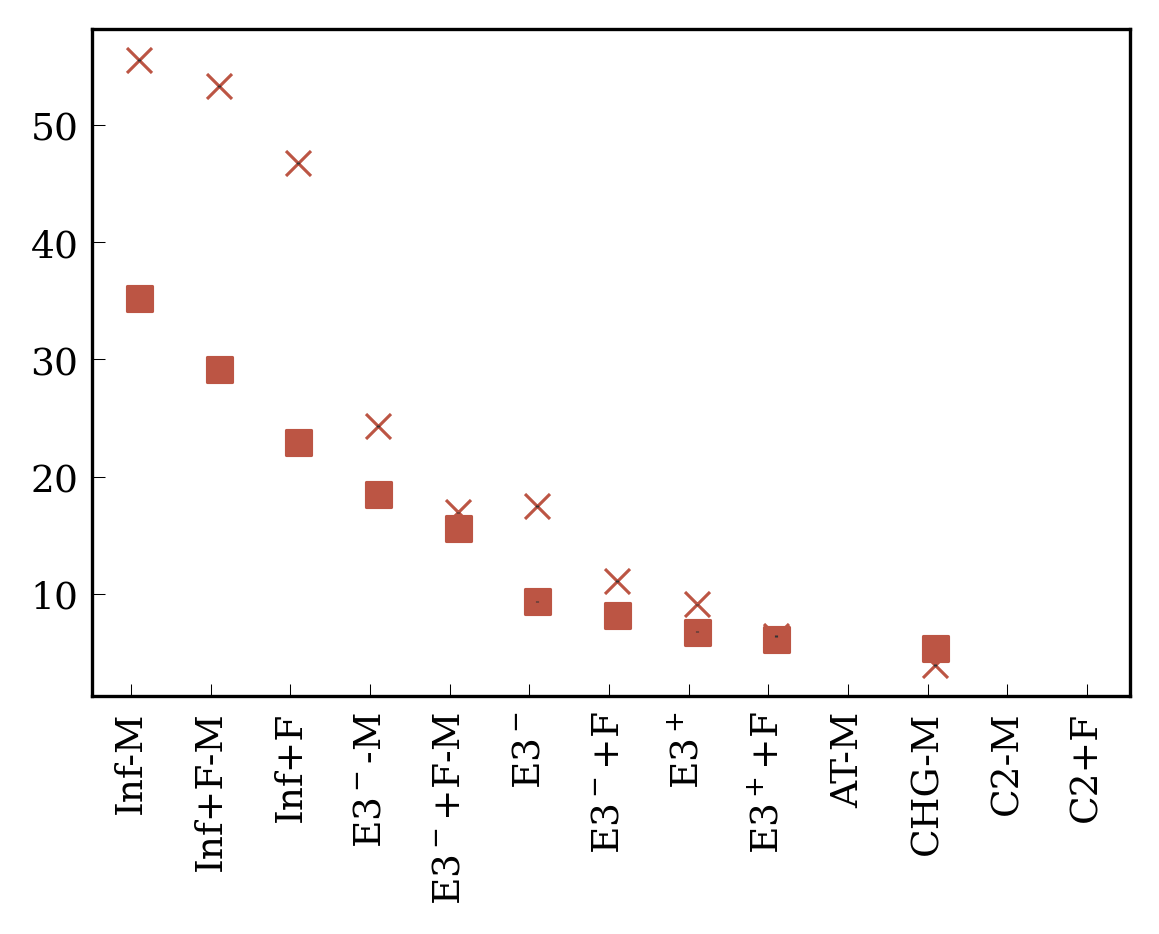

In [25]:
update.main()